多層のdeepencoderを試みる。

In [16]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [17]:
import numpy as np

In [18]:
batch_size = 128
epochs = 300

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [19]:
keep_train_idx = np.logical_or(y_train == 4, y_train == 9)
keep_test_idx = np.logical_or(y_test ==4, y_test == 9)

x_train = x_train[keep_train_idx]
x_test = x_test[keep_test_idx]

In [20]:
x_train_vec = x_train.reshape(x_train.shape[0], 784)
x_test_vec = x_test.reshape(x_test.shape[0], 784)

中央の要素数は先ほどと同じ12個に設定する。層間の比をだいたい同じにすると良い。

In [21]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(12, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(784, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 12)                1212      
_________________________________________________________________
dropout_8 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               1300      
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 784)               79184     
Total para

In [22]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_vec, x_train_vec,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_vec, x_test_vec))
score = model.evaluate(x_test_vec, x_test_vec, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 11791 samples, validate on 1991 samples
Epoch 1/300
11791/11791 [==============================] - 1s - loss: 0.0751 - acc: 0.0080 - val_loss: 0.0524 - val_acc: 0.0015
Epoch 2/300
11791/11791 [==============================] - 1s - loss: 0.0530 - acc: 0.0081 - val_loss: 0.0517 - val_acc: 0.0095
Epoch 3/300
11791/11791 [==============================] - 1s - loss: 0.0515 - acc: 0.0084 - val_loss: 0.0493 - val_acc: 0.0040
Epoch 4/300
11791/11791 [==============================] - 1s - loss: 0.0487 - acc: 0.0102 - val_loss: 0.0465 - val_acc: 0.0090
Epoch 5/300
11791/11791 [==============================] - 1s - loss: 0.0471 - acc: 0.0109 - val_loss: 0.0455 - val_acc: 0.0105
Epoch 6/300
11791/11791 [==============================] - 1s - loss: 0.0463 - acc: 0.0100 - val_loss: 0.0443 - val_acc: 0.0075
Epoch 7/300
11791/11791 [==============================] - 0s - loss: 0.0451 - acc: 0.0102 - val_loss: 0.0424 - val_acc: 0.0095
Epoch 8/300
11791/11791 [==============================

11791/11791 [==============================] - 0s - loss: 0.0361 - acc: 0.0081 - val_loss: 0.0317 - val_acc: 0.0126
Epoch 65/300
11791/11791 [==============================] - 0s - loss: 0.0362 - acc: 0.0092 - val_loss: 0.0316 - val_acc: 0.0100
Epoch 66/300
11791/11791 [==============================] - 1s - loss: 0.0360 - acc: 0.0090 - val_loss: 0.0315 - val_acc: 0.0110
Epoch 67/300
11791/11791 [==============================] - 1s - loss: 0.0361 - acc: 0.0092 - val_loss: 0.0315 - val_acc: 0.0126
Epoch 68/300
11791/11791 [==============================] - 1s - loss: 0.0360 - acc: 0.0089 - val_loss: 0.0314 - val_acc: 0.0121
Epoch 69/300
11791/11791 [==============================] - 1s - loss: 0.0359 - acc: 0.0089 - val_loss: 0.0313 - val_acc: 0.0100
Epoch 70/300
11791/11791 [==============================] - 1s - loss: 0.0359 - acc: 0.0095 - val_loss: 0.0312 - val_acc: 0.0121
Epoch 71/300
11791/11791 [==============================] - 1s - loss: 0.0358 - acc: 0.0082 - val_loss: 0.0312

11791/11791 [==============================] - 1s - loss: 0.0341 - acc: 0.0101 - val_loss: 0.0279 - val_acc: 0.0100
Epoch 128/300
11791/11791 [==============================] - 1s - loss: 0.0340 - acc: 0.0083 - val_loss: 0.0278 - val_acc: 0.0100
Epoch 129/300
11791/11791 [==============================] - 1s - loss: 0.0340 - acc: 0.0092 - val_loss: 0.0278 - val_acc: 0.0116
Epoch 130/300
11791/11791 [==============================] - 1s - loss: 0.0339 - acc: 0.0092 - val_loss: 0.0277 - val_acc: 0.0105
Epoch 131/300
11791/11791 [==============================] - 1s - loss: 0.0340 - acc: 0.0084 - val_loss: 0.0278 - val_acc: 0.0110
Epoch 132/300
11791/11791 [==============================] - 1s - loss: 0.0339 - acc: 0.0088 - val_loss: 0.0277 - val_acc: 0.0105
Epoch 133/300
11791/11791 [==============================] - 0s - loss: 0.0339 - acc: 0.0083 - val_loss: 0.0277 - val_acc: 0.0105
Epoch 134/300
11791/11791 [==============================] - 0s - loss: 0.0338 - acc: 0.0080 - val_loss:

11791/11791 [==============================] - 0s - loss: 0.0330 - acc: 0.0102 - val_loss: 0.0264 - val_acc: 0.0105
Epoch 191/300
11791/11791 [==============================] - 0s - loss: 0.0331 - acc: 0.0089 - val_loss: 0.0264 - val_acc: 0.0100
Epoch 192/300
11791/11791 [==============================] - 0s - loss: 0.0330 - acc: 0.0098 - val_loss: 0.0264 - val_acc: 0.0110
Epoch 193/300
11791/11791 [==============================] - 0s - loss: 0.0330 - acc: 0.0111 - val_loss: 0.0262 - val_acc: 0.0121
Epoch 194/300
11791/11791 [==============================] - 1s - loss: 0.0329 - acc: 0.0098 - val_loss: 0.0263 - val_acc: 0.0105
Epoch 195/300
11791/11791 [==============================] - 0s - loss: 0.0330 - acc: 0.0098 - val_loss: 0.0263 - val_acc: 0.0121
Epoch 196/300
11791/11791 [==============================] - 0s - loss: 0.0329 - acc: 0.0107 - val_loss: 0.0262 - val_acc: 0.0100
Epoch 197/300
11791/11791 [==============================] - 0s - loss: 0.0330 - acc: 0.0087 - val_loss:

11791/11791 [==============================] - 0s - loss: 0.0323 - acc: 0.0103 - val_loss: 0.0256 - val_acc: 0.0116
Epoch 254/300
11791/11791 [==============================] - 0s - loss: 0.0323 - acc: 0.0113 - val_loss: 0.0256 - val_acc: 0.0105
Epoch 255/300
11791/11791 [==============================] - 1s - loss: 0.0322 - acc: 0.0105 - val_loss: 0.0256 - val_acc: 0.0116
Epoch 256/300
11791/11791 [==============================] - 1s - loss: 0.0324 - acc: 0.0113 - val_loss: 0.0256 - val_acc: 0.0121
Epoch 257/300
11791/11791 [==============================] - 1s - loss: 0.0323 - acc: 0.0114 - val_loss: 0.0256 - val_acc: 0.0116
Epoch 258/300
11791/11791 [==============================] - 0s - loss: 0.0324 - acc: 0.0100 - val_loss: 0.0256 - val_acc: 0.0126
Epoch 259/300
11791/11791 [==============================] - 0s - loss: 0.0322 - acc: 0.0126 - val_loss: 0.0256 - val_acc: 0.0121
Epoch 260/300
11791/11791 [==============================] - 1s - loss: 0.0323 - acc: 0.0098 - val_loss:

エポック数は先ほどより長くしたこともあり少々待ち時間がかかる。

## Testing results 

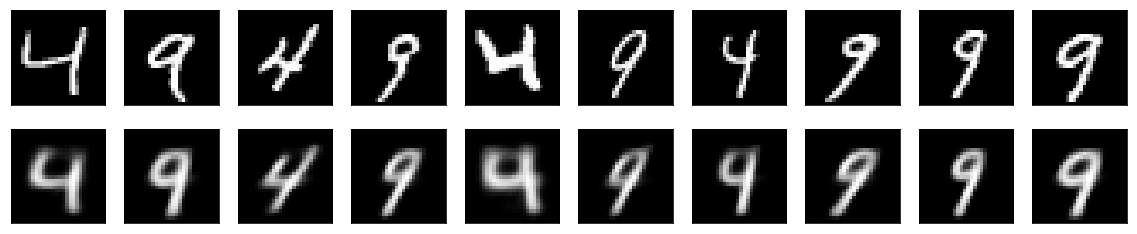

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    predicted = model.predict(x_train_vec[i:i+1]).reshape((28,28))
    plt.imshow(predicted)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

一部はっきりしないweak ４もあるが、単層と比べてかなり良くなった。